<a href="https://colab.research.google.com/github/uhyozzy/Practice/blob/master/Machine%20Learning/%ED%98%BC%EA%B3%B5ML1.3_%EC%8A%A4%EC%BC%80%EC%9D%BC%EC%9D%B4_%EB%8B%A4%EB%A5%B8_%ED%8A%B9%EC%84%B1%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numpy로 데이터 준비하기**

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

**column_stack**
- 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결

In [4]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
fish_data = np.column_stack((fish_length, fish_weight))

In [9]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**np.concatenate()**
- 데이터를 연결시킴

In [12]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [13]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# **사이킷런으로 훈련 세트와 테스트 세트 나누기**

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,random_state=42)

훈련데이터와 테스트 데이터를 각각 36개와 13개로 나눔 (아래에서 확인가능)

입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열

In [17]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [18]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [19]:
print(test_target)
# 도미와 빙어가 잘 섞였는지 테스트 데이터에서 확인 가능(현재는 빙어의 비율이 조금 모자람)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

# stratify매개 변수에 타깃데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

In [22]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# **수상한 도미 한마리**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
print(kn.predict([[25, 150]])) # 도미(1)가 아닌 빙어(0)로 예측

[0.]


k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용

KNeighborsClassifier클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors()메서드를 제공함

이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환함

따라서 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환됨
(아래 그림으로 확인)

<function matplotlib.pyplot.show(close=None, block=None)>

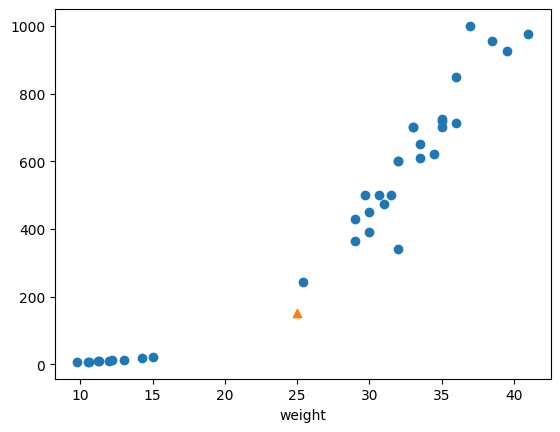

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^') # 새로운 샘플은 marker 매개변수를 '^'로 지정하여 삼각형으로 나타냄
plt.xlabel('length')
plt.xlabel('weight')
plt.show

**indexes배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그리기**

<function matplotlib.pyplot.show(close=None, block=None)>

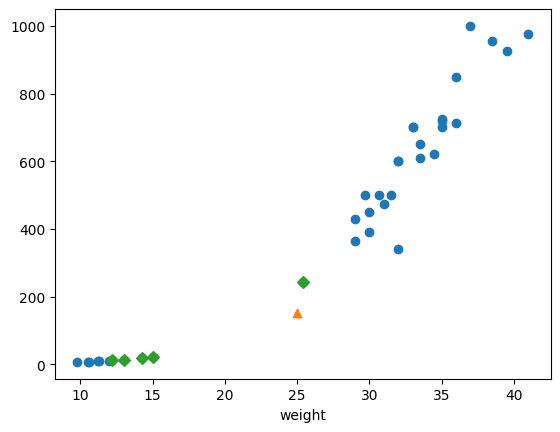

In [31]:
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.xlabel('weight')
plt.show

In [32]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [33]:
train_target[indexes] # 4개의 샘플이 모두 빙어임을 알 수 있음

array([[1., 0., 0., 0., 0.]])

# **기준을 맞춰라**
- x축과 y축의 범위에 따라 최근접 이웃 데이터가 달라짐

<function matplotlib.pyplot.show(close=None, block=None)>

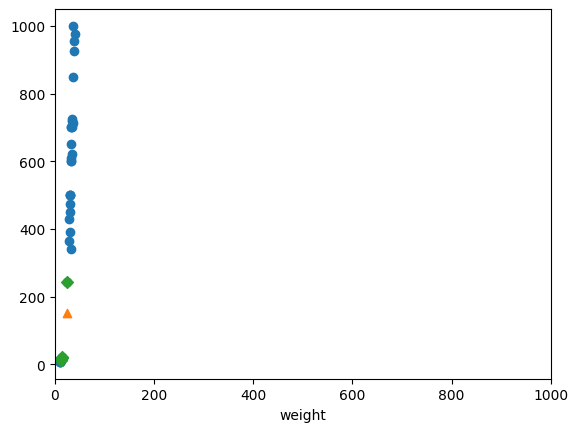

In [34]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim((0,1000)) # x축의 범위 지정
plt.xlabel('length')
plt.xlabel('weight')
plt.show

**z점수를 이용해 전처리 하기**
- 표준점수 : 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져있는지 확인가능

In [35]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [36]:
print(mean,std) # 각열과 행에 해당하는 평균과 표준편차가 구해졌다는 걸 알 수 있음

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [42]:
train_scaled = (train_input - mean) /std

# **전처리 데이터로 모델 훈련하기**

<function matplotlib.pyplot.show(close=None, block=None)>

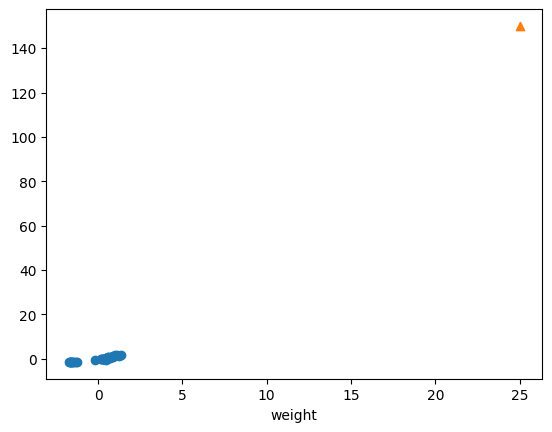

In [43]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

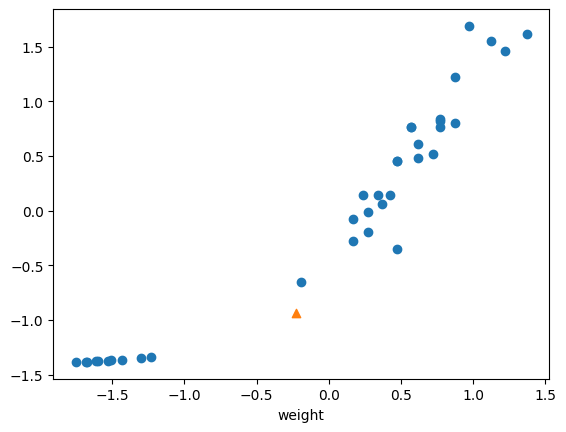

In [45]:
new = ([25,150] - mean) /std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show

In [46]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [47]:
test_scaled = (test_input - mean) /std

In [48]:
kn.score(test_scaled, test_target)

1.0

In [49]:
print(kn.predict([new])) # 드디어 도미(1)로 예측함

[1.]


<function matplotlib.pyplot.show(close=None, block=None)>

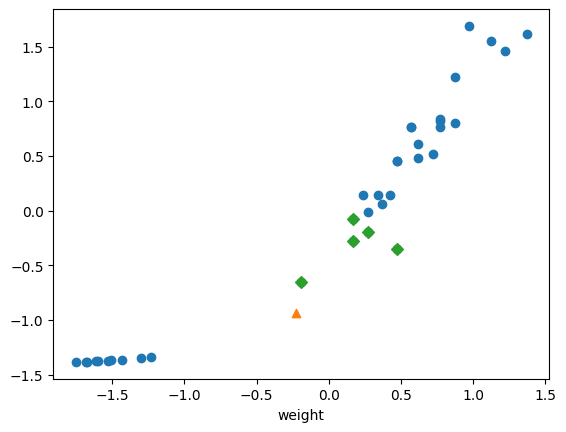

In [50]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.xlabel('weight')
plt.show